# Chuẩn bị dữ liệu

In [45]:
!pip install imbalanced-learn


Defaulting to user installation because normal site-packages is not writeable


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from imblearn.combine import SMOTEENN, SMOTETomek
from imblearn.over_sampling import RandomOverSampler

In [3]:

data = pd.read_csv('creditcard.csv')
print(data.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [4]:
print(data.head())
print(data.info())
print(f"Số dòng: {data.shape[0]}")

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [5]:
print(f"Số dòng: {data.shape[0]}")
data['Class'].value_counts(normalize=True) * 100

Số dòng: 284807


Class
0    99.827251
1     0.172749
Name: proportion, dtype: float64

In [6]:
print(data.columns)


Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


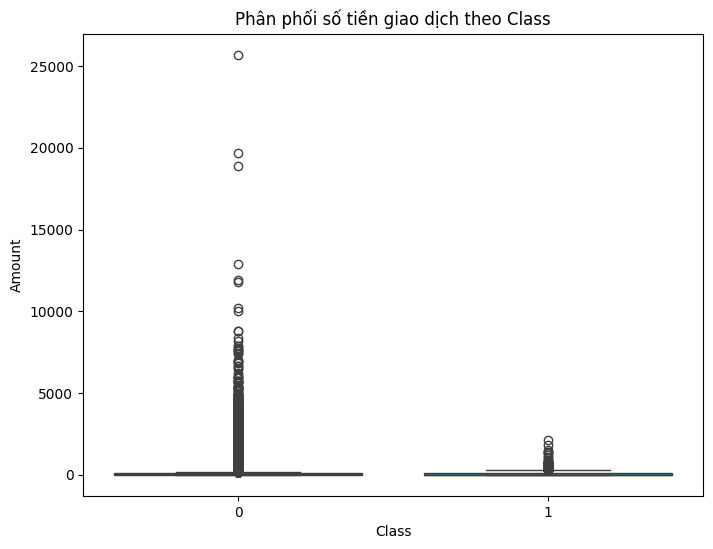

In [7]:


# Biểu đồ Boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Class', y='Amount', data=data)
plt.title("Phân phối số tiền giao dịch theo Class")
plt.xlabel("Class")
plt.ylabel("Amount")
plt.show()


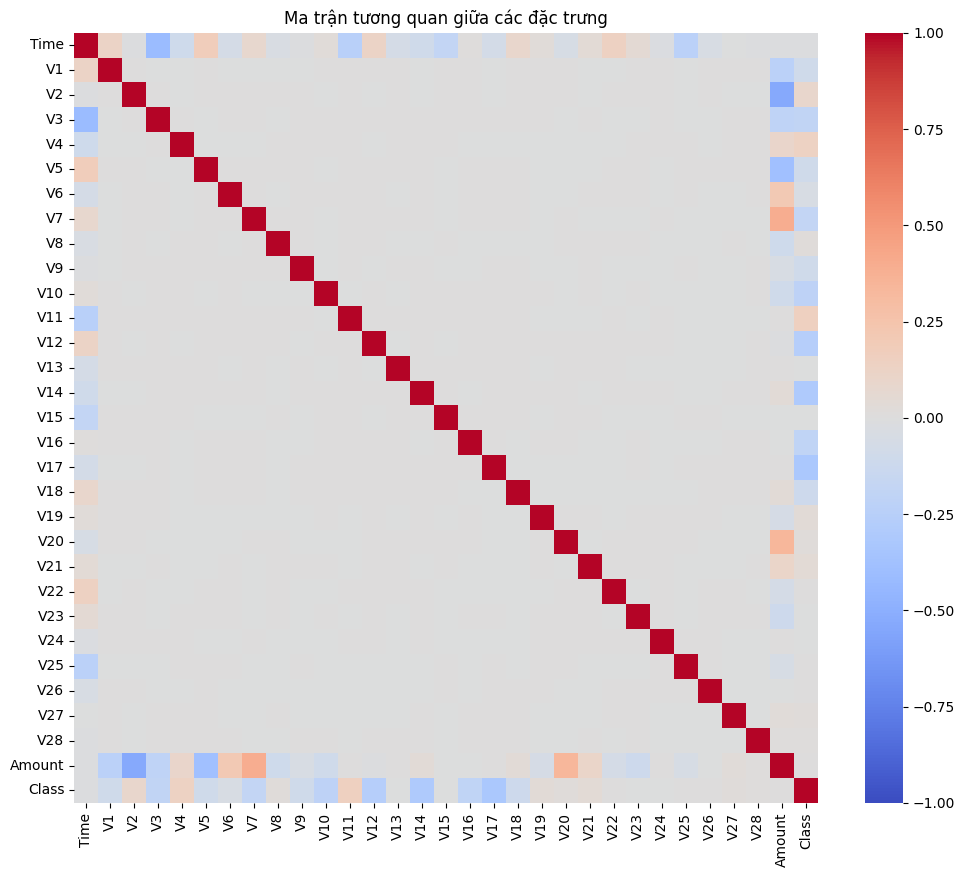

In [8]:
# Tính ma trận tương quan
corr_matrix = data.corr()

# Vẽ heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap="coolwarm", vmax=1.0, vmin=-1.0, annot=False)
plt.title("Ma trận tương quan giữa các đặc trưng")
plt.show()


# Xử lý dữ liệu

In [9]:


# Chuẩn hóa cột Amount và Time
data['scaled_amount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1, 1))
data['scaled_time'] = StandardScaler().fit_transform(data['Time'].values.reshape(-1, 1))

# Loại bỏ các cột gốc
data = data.drop(['Amount', 'Time'], axis=1)

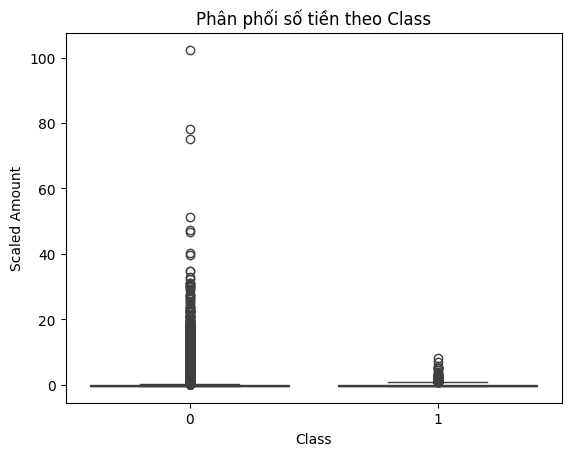

In [10]:
# Phân phối Amount theo Class
sns.boxplot(x='Class', y='scaled_amount', data=data)
plt.title("Phân phối số tiền theo Class")
plt.xlabel("Class")
plt.ylabel("Scaled Amount")
plt.show()


In [11]:

# Chia tập dữ liệu thành đặc trưng (X) và nhãn (y)
X = data.drop('Class', axis=1)
y = data['Class']

# Chia dữ liệu thành tập huấn luyện và kiểm tra (70:30)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Hàm đánh giá mô hình
def evaluate_model(model_name, y_test, y_pred, y_pred_proba):
    print(f"\nModel: {model_name}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print(f"ROC-AUC Score: {roc_auc_score(y_test, y_pred_proba):.4f}")
    return roc_auc_score(y_test, y_pred_proba)

# Kết quả ROC-AUC để lưu trữ
results = {}

# 1. SMOTE-ENN
smote_enn = SMOTEENN(random_state=42)
X_train_smote_enn, y_train_smote_enn = smote_enn.fit_resample(X_train, y_train)

rf_smote_enn = RandomForestClassifier(random_state=42)
rf_smote_enn.fit(X_train_smote_enn, y_train_smote_enn)
y_pred_smote_enn = rf_smote_enn.predict(X_test)
y_pred_proba_smote_enn = rf_smote_enn.predict_proba(X_test)[:, 1]

results['SMOTE-ENN'] = evaluate_model("SMOTE-ENN", y_test, y_pred_smote_enn, y_pred_proba_smote_enn)



Model: SMOTE-ENN
Confusion Matrix:
[[85263    32]
 [   32   116]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.78      0.78      0.78       148

    accuracy                           1.00     85443
   macro avg       0.89      0.89      0.89     85443
weighted avg       1.00      1.00      1.00     85443

ROC-AUC Score: 0.9716


In [12]:
# 2. SMOTE-Tomek Links
smote_tomek = SMOTETomek(random_state=42)
X_train_smote_tomek, y_train_smote_tomek = smote_tomek.fit_resample(X_train, y_train)

rf_smote_tomek = RandomForestClassifier(random_state=42)
rf_smote_tomek.fit(X_train_smote_tomek, y_train_smote_tomek)
y_pred_smote_tomek = rf_smote_tomek.predict(X_test)
y_pred_proba_smote_tomek = rf_smote_tomek.predict_proba(X_test)[:, 1]

results['SMOTE-Tomek'] = evaluate_model("SMOTE-Tomek Links", y_test, y_pred_smote_tomek, y_pred_proba_smote_tomek)




Model: SMOTE-Tomek Links
Confusion Matrix:
[[85275    20]
 [   33   115]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.85      0.78      0.81       148

    accuracy                           1.00     85443
   macro avg       0.93      0.89      0.91     85443
weighted avg       1.00      1.00      1.00     85443

ROC-AUC Score: 0.9485


In [13]:
# 3. Random Oversampling
random_oversampler = RandomOverSampler(random_state=42)
X_train_over, y_train_over = random_oversampler.fit_resample(X_train, y_train)

rf_over = RandomForestClassifier(random_state=42)
rf_over.fit(X_train_over, y_train_over)
y_pred_over = rf_over.predict(X_test)
y_pred_proba_over = rf_over.predict_proba(X_test)[:, 1]

results['Random Oversampling'] = evaluate_model("Random Oversampling", y_test, y_pred_over, y_pred_proba_over)




Model: Random Oversampling
Confusion Matrix:
[[85290     5]
 [   41   107]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.96      0.72      0.82       148

    accuracy                           1.00     85443
   macro avg       0.98      0.86      0.91     85443
weighted avg       1.00      1.00      1.00     85443

ROC-AUC Score: 0.9508


In [28]:
# So sánh kết quả
results_df = pd.DataFrame(list(results.items()), columns=['Method', 'ROC-AUC'])
results_df.sort_values(by='ROC-AUC', ascending=False, inplace=True)

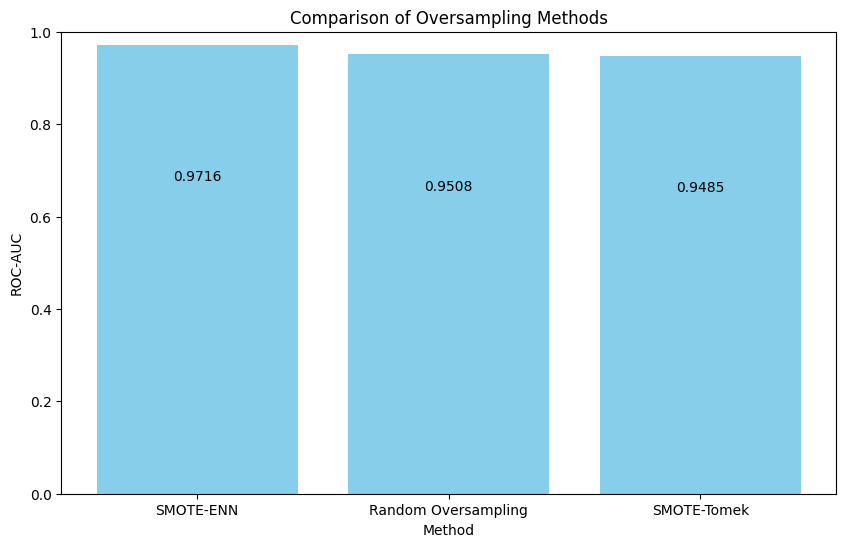

In [44]:
plt.figure(figsize=(10, 6))
bars = plt.bar(results_df['Method'], results_df['ROC-AUC'], color='skyblue')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval - 0.3, round(yval, 4), ha='center', va='bottom')

plt.xlabel('Method')
plt.ylabel('ROC-AUC')
plt.title('Comparison of Oversampling Methods')
plt.ylim(0, 1)  # Giới hạn trục y từ 0 đến 1
plt.show()